<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/LSTM_Nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install Tensorflow
!pip install -q tensorflow-gpu==2.9.0
import tensorflow as tf
print(tf.__version__)

2.9.0


In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Make the original data
series = np.sin((0.1*np.arange(400))**2)

<function matplotlib.pyplot.show(*args, **kw)>

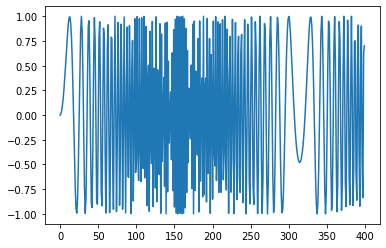

In [4]:
#plot it
plt.plot(series)
plt.show

In [5]:
## build the dataset
#let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t + T]
  Y.append(y)
X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (390, 10) Y.shape (390,)


In [10]:
###autoregressive linear model
i = Input(shape=(T,))
x=Dense(1)(i)
model = Model(i,x)
model.compile (
  loss='mse',
  optimizer=Adam(learning_rate=0.1),
)
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 1s 26ms/step - loss: 0.9507 - val_loss: 0.5505
Epoch 2/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5165 - val_loss: 0.7802
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5677 - val_loss: 0.6929
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5216 - val_loss: 0.6159
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5263 - val_loss: 0.6316
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.5416 - val_loss: 0.6182
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5176 - val_loss: 0.6447
Epoch 8/80
7/7 [==============================] - 0s 7ms/step - loss: 0.5253 - val_loss: 0.6362
Epoch 9/80
7/7 [==============================] - 0s 11ms/step - loss: 0.5192 - val_loss: 0.6343
Epoch 10/80
7/7 [==============================] - 0s 10ms/step - loss: 0.5109 - val_loss: 0.6706
Epoch 11/80
7/7 [==================

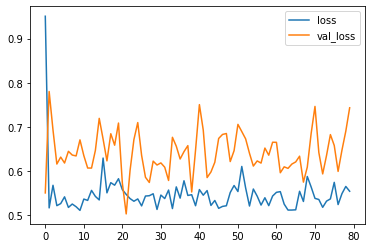

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

13/13 [==============================] - 0s 3ms/step
(390, 1)


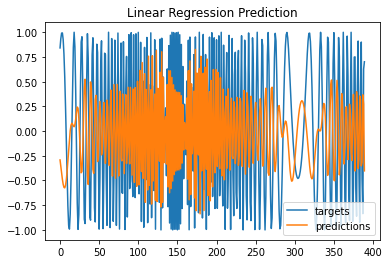

In [13]:
#one-step forecast using true targets
#Note: even the one step forecast fails badly
outputs =  model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Prediction")
plt.legend()
plt.show()

1/1 [==============================] - 0s 36ms/step


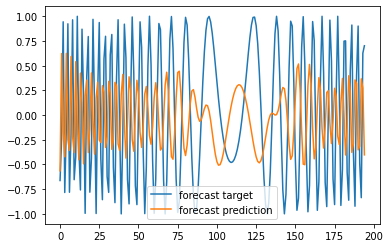

In [15]:
#This is the code we had before-it does the same thing
#one step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []
#index of first validation input
i=-N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] #1x1 array->scalar
  i += 1
  #update the predictions lists
  validation_predictions.append(p)

  
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()


In [21]:
###Now try the RNN/LSTM model
X=X.reshape(-1, T, 1)
##make the RNN
i = Input(shape=(T, D))
x=LSTM(10)(i)
x=Dense(1)(x)
model = Model(i, x)
model.compile (
    loss='mse',
    optimizer=Adam(learning_rate=0.05),
)

#train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:])
)


Epoch 1/200
7/7 [==============================] - 3s 89ms/step - loss: 0.5551 - val_loss: 0.5187
Epoch 2/200
7/7 [==============================] - 0s 12ms/step - loss: 0.5042 - val_loss: 0.5728
Epoch 3/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4897 - val_loss: 0.5873
Epoch 4/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4740 - val_loss: 0.5221
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.4389 - val_loss: 0.5911
Epoch 6/200
7/7 [==============================] - 0s 18ms/step - loss: 0.4022 - val_loss: 0.4988
Epoch 7/200
7/7 [==============================] - 0s 13ms/step - loss: 0.2584 - val_loss: 0.3321
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1967 - val_loss: 0.2462
Epoch 9/200
7/7 [==============================] - 0s 14ms/step - loss: 0.2072 - val_loss: 0.2066
Epoch 10/200
7/7 [==============================] - 0s 14ms/step - loss: 0.1429 - val_loss: 0.3096
Epoch 11/200
7/7 [=

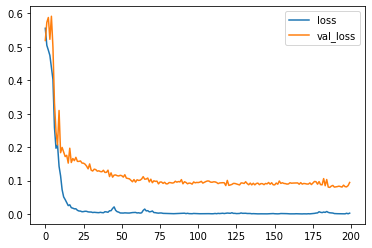

In [22]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

13/13 [==============================] - 0s 2ms/step
(390, 1)


<function matplotlib.pyplot.show(*args, **kw)>

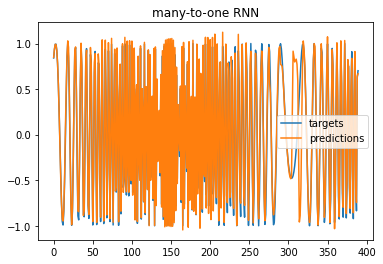

In [23]:
#One step forecast
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show


1/1 [==============================] - 0s 24ms/step


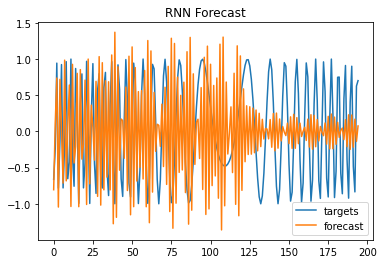

In [26]:
#Multistep forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  #reshape the input to NxTxD
  f = model.predict(input_.reshape(1, T, 1))[0, 0]
  forecast.append(f)

  #make a new input with the latest forecast
  input_=np.roll(input_, -1)
  input_[-1]=f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()